In [3]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import beyondnlp
from beyondnlp import *
import time
from snownlp import SnowNLP

In [2]:
wv_all = KeyedVectors.load_word2vec_format(datapath('F:/MyDownloads/merge_sgns_bigram_char300.txt/merge_sgns_bigram_char300.txt'), binary=False)

In [3]:
vocab = wv_all.vocab # a vocabulary dict
wv_all.most_similar('英语')

[('外语', 0.7959698438644409),
 ('英语口语', 0.7888786792755127),
 ('口语', 0.7536984086036682),
 ('韩语', 0.7520150542259216),
 ('俄语', 0.7471973299980164),
 ('日语', 0.743578314781189),
 ('法语', 0.736529529094696),
 ('汉语', 0.7164155840873718),
 ('英文', 0.7086695432662964),
 ('学英语', 0.6994340419769287)]

In [9]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import time
################句子转化成向量##############
def sentence2vec(sentence):
    t1 = time.time()
    words = text2words(sentence)
    t2 = time.time()
    sen_v = np.zeros((300))
    n = 0
    t3 = time.time()
    for word in words:
        if word in vocab.keys() and word!='':
            n += 1
            word_v = wv_all[word]
            sen_v = sen_v+word_v
    if n>0:
        sen_v = sen_v/n
    t4 = time.time()
    return sen_v

####### 端到端：从文件输出可以直接聚类的向量列表：##############
def from_file_to_vector_list(filepath):
    text = open(filepath,'r',encoding='utf-8').read()
    sentences = SnowNLP(text).sentences
#     sentences = file2sentences(filepath=filepath)  ## 这玩意儿不行，很多句子没分出来。。。所以还是用snownlp吧
#     print("Length of sentences:",len(sentences))
    sentences_v = []
    for sentence in sentences:
        v = sentence2vec(sentence)
        sentences_v.append(np.array(v))
#     print("Length of vectors:",len(sentences_v))
    return [sentences,sentences_v]

In [10]:
## 获取文本的句子、向量：
sentences = []
vectors = []
for i in range(4871):
    filepath = 'C:/Users/x1c/Documents/WeChat Files/LIghTGBY/Files/sf_cvs/sf_cvs/%d.txt'%i
    file_sentences,file_vectors = from_file_to_vector_list(filepath)
    sentences += file_sentences
    vectors += file_vectors
    if i%100 == 0:
        print(i,"files finished.")
        
print("sentences length:",len(sentences))
print("vectors length:",len(vectors))

0 files finished.
100 files finished.
200 files finished.
300 files finished.
400 files finished.
500 files finished.
600 files finished.
700 files finished.
800 files finished.
900 files finished.
1000 files finished.
1100 files finished.
1200 files finished.
1300 files finished.
1400 files finished.
1500 files finished.
1600 files finished.
1700 files finished.
1800 files finished.
1900 files finished.
2000 files finished.
2100 files finished.
2200 files finished.
2300 files finished.
2400 files finished.
2500 files finished.
2600 files finished.
2700 files finished.
2800 files finished.
2900 files finished.
3000 files finished.
3100 files finished.
3200 files finished.
3300 files finished.
3400 files finished.
3500 files finished.
3600 files finished.
3700 files finished.
3800 files finished.
3900 files finished.
4000 files finished.
4100 files finished.
4200 files finished.
4300 files finished.
4400 files finished.
4500 files finished.
4600 files finished.
4700 files finished.
4800

In [11]:
from pandas.core.frame import DataFrame
import pandas as pd
pd1 = DataFrame(sentences,columns=['sentences'])
pd2 = DataFrame(vectors)
pd.concat([pd1,pd2],axis=1)

sentences         0         1  \
0      扫描记录物件 维修苹果手表不良品 通过电话向客户介绍贷款业务 电话销售金融产品 测试发动机机...  0.152631 -0.167182   
1      1、负责新员工培训，员工晋升培训<br />2、负责管理培训工作，及公司月考工作<br />...  0.380755 -0.006035   
2           <br />2.具有现代领先的培训理念，负责建立和完善培训体系、制度和流程，并组织实施；  0.321338  0.021508   
3             <br />3、行政管理<br />a.组织建立公司计划管理体系，并指导、监督实施；  0.324265  0.113779   
4              <br />6、绩效管理<br />a.组织建立公司绩效考核体系并指导实施和调整；  0.300706  0.060972   
5             <br />6、建立培训体系，开展员工培训，关注员工发展，做好人才的考察、培养工作；  0.228821  0.037198   
6       全面负责集团人力资源规划、管理工作：<br />1、根据集团战备及企业发展规划制定人力资源规划；  0.382181  0.052680   
7                       <br />i.督促档案管理，审核机要档案借阅、复印、销毁申请；  0.282003 -0.001862   
8                                     <br />4、办公物品及设备管理；  0.307232  0.023357   
9                      <br />d.审核公司年度招聘、培训计划，发掘、引进中高级人才；  0.225711  0.071320   
10                      <br />b.组织公司制度、流程管理体系建设、落实和调整工作；  0.351959  0.048086   
11                       <br />b.审查分管职能部门人才的招聘、任免、晋升、调配；  0.347742 -0.125460   
12                              <br />8、负责日常劳动人事管理与纠纷解决。  0.198358 -0.001742   
13      <br />9、组织管理及管理体系建设<br />a.建立和完善行政人事部门人员聘用及培养工作；  0.380941  0.039721   
14                     <br />e.组织开展公司员工职业生涯规划，发掘并培养重点人才；  0.233484  0.075835   
15                  <br />2、负责拓展和疏通招聘渠道、制定员工招聘流程并负责具体实施；  0.292924 -0.031798   
16                           <br />b.审批分管职能部门的核心职位的继任计划；  0.448667 -0.015798   
17               学院有编制将近30名工作人员，设有超市、食堂、活动中心、农场等各种设施或机构）  0.250245 -0.151064   
18              <br />d.督促印章刻制、挂失、作废管理和涉及经济利益和法律风险的印章使用；  0.206711  0.053695   
19                        <br />c.审批分管职能部门的专业培训计划，并监督执行。  0.256839 -0.002163   
20                                <br />7、负责薪酬福利设计与管理工作；  0.228935  0.066292   
21                            <br />b.审核公司管理费用预算并组织监督执行；  0.165023  0.090631   
22                   <br />3、负责公司员工薪酬、福利、社会保险等劳动、用工相关工作；  0.270638  0.078523   
23     <br />2、负责公司各种规章制度的规划、编制、组织实施与检讨，各项流程规范的设（修）订工...  0.285071  0.090099   
24                      <br />4、负责员工招聘管理工作，负责高管人才的引进与考核；  0.237357  0.034060   
25                          <br />11、跨部门的沟通协调和总裁交办的其他工作。  0.426632 -0.032353   
26                            <br />d.主持拟定行政人事管理制度及业务流程。  0.324703  0.052545   
27                   <br />10、企业文化宣传建设，办好企业内刊及部门内部的组织管理。  0.301185 -0.043694   
28                  <br />5.负责对外部培训机构的评估、选择、培训项目合作协议等管理；  0.153266 -0.005706   
29                        <br />5、负责新员工的岗前培训和公司内部长期培训计划；  0.230408  0.064637   
...                                                  ...       ...       ...   
54789  <br />- 观察有用的市场信息并与所有相关人员，部门和客户分享，包括行业动态，市场价格，...  0.179966 -0.159883   
54790              <br />- 与财账部门合作，并确保来自指定客户的所有收入都能及时结清。  0.102776 -0.002578   
54791                        <br /><br />二、由于业绩突出，沟通能力强。  0.334931  0.015436   
54792                具体有:<br />-与所有客户联系人及其同事建立密切良好的工作关系。  0.244570  0.021071   
54793                    这个v108可视门铃项目，这个产品用的是ucos实时操作系统。  0.180169 -0.185582   
54794  这个366智慧锁项目，主要功能有rf卡开锁，蓝牙开锁，密码开锁，gsm开锁，远程开锁，防盗拨...  0.469986 -0.226686   
54795                           我主要是参与智慧锁的开发还有可视对讲门铃的维护。  0.361833 -0.075770   
54796                                   公司主要从事消防产品研发和生产。  0.361147 -0.190040   
54797  公司主要是给奥玛，钢宇，康乐佳，尚步，舒华跑步机提供核心部件电子表研发和生产，我主要负电子表...  0.148340 -0.237808   
54798  跑步机各功能的参数显示在通过ui显示在7寸上，可以用播放电影和音乐，wifi上网等功能，cp...  0.080076 -0.170126   
54799  这两个物联网传输模块的主要目的是将火灾报警控制器的报警，故障信息通过以太网或3g网络传输给物...  0.190495 -0.262487   
54800                        在技术部工作的一年多时间里，对avr单片机很深的理解。  0.194022 -0.124362   
54801                            客户通过平台提供的帐号，查询火灾报警制器状态。  0.180346 -0.338115   
54802                                    公司主要是从事生产液体传感器。  0.214556 -0.162791   
54803                                其中涉及到触摸按键和蓝牙，以及射频卡。  0.159555 -0.069169   
54804                                当探测器得到电源之后，先给mq4加热。  0.313718 -0.231117   
54805                  除此之外，负责修改过其它项目的声音调试，图像调试，修改各种bug。  0.126321 -0.136223   
54806  跑步机分电子表部分和电机控制部分，跑步机操作都在电子表部分完成，包括mp3(utc2025功...  0.139788 -0.175353   
54807  硬件有射频a7130用来内机和外机之间数据传输，用5+1时序对图像和语音传输，主

## K-means 聚类：

In [13]:
### 进行K-means聚类，并把结果写进csv文件中：
def cluster_vectors(name,sentences,vectors,num_clusters=5):
    num_clusters = num_clusters
    km_cluster = KMeans(n_clusters=num_clusters, max_iter=100, n_init=40, \
                        init='k-means++',n_jobs=-1)
    class_result = km_cluster.fit_predict(vectors)
    print("Predicting result: \n", class_result)
    vectors_pd = DataFrame(vectors)
    sentences_pd = DataFrame(sentences,columns=['sentence'])
    class_pd = DataFrame(class_result,columns=['class'])
    final_result = pd.concat([class_pd,sentences_pd,vectors_pd], axis=1)
    final_result.to_csv("%s_"%name+"cluster.csv", sep=',', header=False)
    print("文件："+"%s_"%name+"cluster.csv","已经写入并保存！")
    v_c_pd = pd.concat([vectors_pd,class_pd],axis=1)
    v_c_pd.to_csv("%s_"%name+"v_c.csv",sep=',', header=False)
    print("文件："+"%s_"%name+"v_c.csv","已经写入并保存！")
    
    ### 将每一类的文本单独写进一个TXT文件：
#     for i in range(num_clusters):
#         s = final_result['sentence'][final_result['class']==i]
#         s = np.array(s)
#         f = open('cluster_results/%s-text%d.txt'%(name,i),'w',encoding='utf-8')
#         for each in s:
#             f.write(each)
#         f.close()
#         print("聚类文件："+'cluster_results/%s-text%d.txt'%(name,i),"已经写入并保存！")
#     return final_result

In [14]:
# duty_final_result = cluster_vectors(classname='duty',sentences=duty_sentences,vectors=duty_vectors)
# job_final_result = cluster_vectors(classname='job',sentences=job_sentences,vectors=job_vectors)
num_clusters = 10
op_final_result = cluster_vectors(name='sf_cv_10class',sentences=sentences,vectors=vectors,num_clusters=num_clusters)

Predicting result: 
 [1 2 2 ... 9 9 1]
文件：sf_cv_10class_cluster.csv 已经写入并保存！
文件：sf_cv_10class_v_c.csv 已经写入并保存！


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def generate_cloud(classname):
    for i in range(num_clusters):
        f = open('cluster_results/%s-text%d.txt'%(classname,i),'r',encoding='utf-8')
        text = f.read()
        cut_words = jieba.lcut(text)
        new_text = '.'.join(cut_words)
        font = 'C:/Windows/Fonts/simfang.ttf'
        wc = WordCloud(collocations=False, font_path=font, width=500, height=500, margin=2).generate(new_text)
        plt.imshow(wc)
        plt.axis("off")
        plt.title(classname+str(i))
        plt.show()
        wc.to_file('cluster_results/cloud_images/%s-%d.png'%(classname,i))

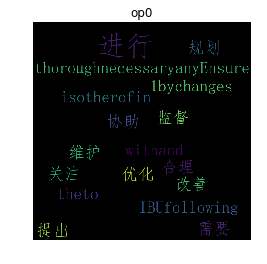

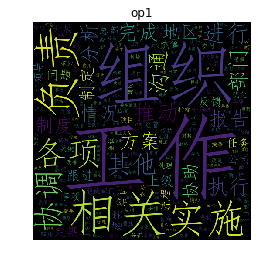

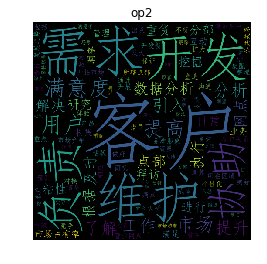

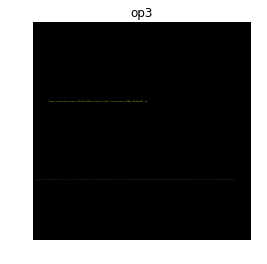

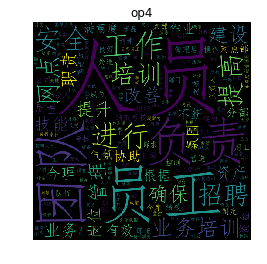

In [46]:
# generate_cloud('duty')
# generate_cloud('job') 
generate_cloud('op')

## T-SNE降维可视化：

In [ ]:
from sklearn.manifold import TSNE

In [36]:
duty_embedded = TSNE(n_components=2,early_exaggeration=100).fit_transform(duty_vectors)
job_embedded = TSNE(n_components=2,early_exaggeration=100).fit_transform(job_vectors)
# tsne=pd.DataFrame(tsne.embedding_,index=data_zs.index) #转换数据格式

# d=tsne[r[u'聚类类别']==0]
# plt.plot(d[0],d[1],'r.')
# d=tsne[r[u'聚类类别']==1]
# plt.plot(d[0],d[1],'go')
# d=tsne[r[u'聚类类别']==2]
# plt.plot(d[0],d[1],'b*')
# plt.show()

In [33]:
len(duty_embedded[:,1])

1610

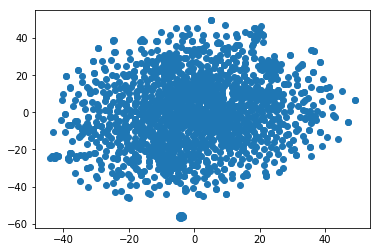

In [37]:
plt.scatter(duty_embedded[:,0],duty_embedded[:,1])
plt.show()

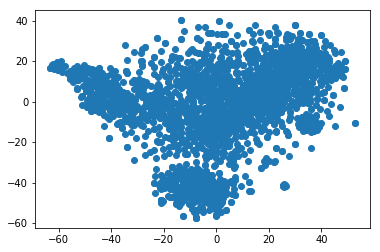

In [38]:
plt.scatter(job_embedded[:,0],job_embedded[:,1])
plt.show()

In [99]:
len(text2sentences('到底是怎么,回事到底，是怎么回事,到底是，怎么回事到,底是怎么,回事，到底是怎,么回事到底,是怎么回事到底是怎么回事到底是怎么回事到底是怎么回事儿！！'))

2